In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
BATCH_SIZE=64
IMG_SHAPE=150

In [8]:
train_image_generator=ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,directory=train_dir,shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen=train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,directory=validation_dir,shuffle=True,target_size=(IMG_SHAPE,IMG_SHAPE),class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(2)])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
EPOCHS=100

import tensorflow as tf

EatlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=7, verbose=0,mode='max', restore_best_weights=True)

tf.debugging.set_log_device_placement(True)
history=model.fit(train_data_gen,
                            steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
                            epochs=EPOCHS,validation_data=val_data_gen,
                            validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))), callbacks = [EatlyStopping])

Epoch 1/100
32/32 [==============================] - 19s 521ms/step - loss: 0.7138 - accuracy: 0.5115 - val_loss: 0.6930 - val_accuracy: 0.5340
Epoch 2/100
32/32 [==============================] - 9s 272ms/step - loss: 0.6932 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 9s 272ms/step - loss: 0.6925 - accuracy: 0.5300 - val_loss: 0.6848 - val_accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 9s 273ms/step - loss: 0.6745 - accuracy: 0.5770 - val_loss: 0.6545 - val_accuracy: 0.6390
Epoch 5/100
32/32 [==============================] - 9s 272ms/step - loss: 0.6117 - accuracy: 0.6655 - val_loss: 0.5961 - val_accuracy: 0.6840
Epoch 6/100
32/32 [==============================] - 9s 288ms/step - loss: 0.5785 - accuracy: 0.7005 - val_loss: 0.5977 - val_accuracy: 0.6780
Epoch 7/100
32/32 [==============================] - 9s 274ms/step - loss: 0.5236 - accuracy: 0.7360 - val_loss: 0.5543 - val_accuracy: 0.730

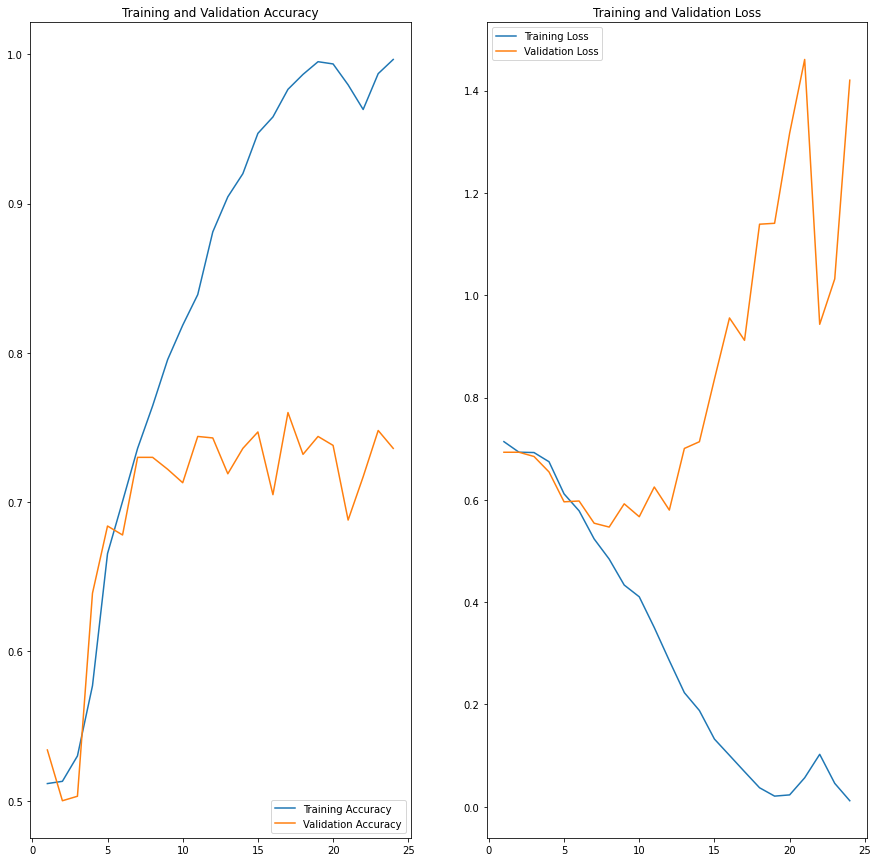

In [15]:
acc=history.history['accuracy']#training accuracy
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']



plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(np.arange(1,len(acc) + 1), acc, label='Training Accuracy')
plt.plot(np.arange(1,len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(np.arange(1,len(loss) + 1),loss,label='Training Loss')
plt.plot(np.arange(1,len(val_loss) + 1),val_loss,label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

### Why we don't get good results?
It's apparent that we don't have much data to train our model, there's an underfitting here due to the lack of training data (only 1000 samples to each class).